## Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub


import os

from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split


# Downland Dataset

In [4]:
# Download latest version
path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset")

PATH = os.path.join(path, 'Exam_Score_Prediction.csv')
print("Path to dataset files:", PATH)

Path to dataset files: /home/franio/.cache/kagglehub/datasets/kundanbedmutha/exam-score-prediction-dataset/versions/2/Exam_Score_Prediction.csv


# Getting Data, tiding up data

In [5]:
data = pd.read_csv(PATH)
data.drop('student_id', axis=1, inplace=True) # We do not need it
data.drop(data[data['gender'] == 'other'].index, inplace=True)

data

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19992,17,male,b.com,5.74,81.4,yes,7.5,good,online videos,high,hard,95.0
19993,19,female,ba,3.28,73.3,yes,9.5,good,group study,high,easy,93.9
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


# Feature Engineering
Some data is qualitative, so we need to make it quantitative

## Qualitative data

In [6]:
qualitative_features_name = ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
unique_qualitative_features = {}

for feature in qualitative_features_name:
    unique_qualitative_features[feature] = data[feature].unique()

unique_qualitative_features = pd.DataFrame.from_dict(unique_qualitative_features, orient='index')
unique_qualitative_features

,0,1,2,3,4,5,6
gender,male,female,None,None,None,None,None
course,diploma,b.sc,b.tech,bba,ba,b.com,bca
internet_access,yes,no,None,None,None,None,None
sleep_quality,poor,good,average,None,None,None,None
study_method,coaching,mixed,online videos,self-study,group study,None,None
facility_rating,low,high,medium,None,None,None,None
exam_difficulty,hard,moderate,easy,None,None,None,None


## Feature Engineering

In [7]:
data_copy = data.copy()

# Binary Features
data_copy['gender'] = data['gender'].map({'male': 1, 'female': 0})
data_copy['internet_access'] = data['internet_access'].map({'yes': 1, 'no': 0})

# Nominal Features
data_copy['sleep_quality'] = data['sleep_quality'].map({'poor':0, 'average':1, 'good':2})
data_copy['facility_rating'] = data['facility_rating'].map({'low':0, 'medium':1, 'high':2})
data_copy['exam_difficulty'] = data['exam_difficulty'].map({'easy':0, 'moderate':1, 'hard':2})

# Dummy variables for qualitative not nominal variables
# Course - I assume only if it is just diploma or university course
data_copy['diploma'] = [1 if d == 'diploma' else 0 for d in data['course']]
data_copy.drop('course', axis=1, inplace=True)

# Study Method
data_copy['group_study'] = [1 if d == 'group study' else 0 for d in data['study_method']]
data_copy['self_study'] = [1 if d == 'self-study' else 0 for d in data['study_method']]
data_copy['online_videos'] = [1 if d == 'online videos' else 0 for d in data['study_method']]
data_copy['coaching'] = [1 if d == 'coaching' else 0 for d in data['study_method']]
data_copy['coaching'] = [1 if d == 'coaching' else 0 for d in data['study_method']]
data_copy['mixed'] = [1 if d == 'mixed' else 0 for d in data['study_method']]
data_copy.drop('study_method', inplace=True, axis=1)



data_copy

,age,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,diploma,group_study,self_study,online_videos,coaching,mixed
0,17,1,2.78,92.9,1,7.4,0,0,2,58.9,1,0,0,0,1,0
2,22,1,7.88,76.8,1,8.5,0,2,1,90.3,0,0,0,0,1,0
4,20,0,0.89,71.6,1,9.8,0,0,1,43.7,1,0,0,0,1,0
5,23,1,3.48,65.4,1,4.2,2,0,1,58.2,0,0,0,0,0,1
6,17,0,1.35,69.0,1,7.4,1,2,2,53.7,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,17,1,5.74,81.4,1,7.5,2,2,2,95.0,0,0,0,1,0,0
19993,19,0,3.28,73.3,1,9.5,2,2,0,93.9,0,1,0,0,0,0
19996,18,1,3.71,41.6,0,5.9,1,1,1,60.9,0,0,0,0,1,0
19998,19,1,4.60,76.3,0,6.1,2,1,1,79.0,0,0,1,0,0,0


# Data Split

In [8]:
y = data_copy['exam_score']
X = data_copy.drop('exam_score', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x_train

,age,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,diploma,group_study,self_study,online_videos,coaching,mixed
1747,20,1,5.57,43.4,0,5.4,1,2,0,0,0,1,0,0,0
2351,23,0,3.52,61.1,1,4.6,0,2,1,1,0,0,0,1,0
7551,20,0,1.83,58.6,1,9.3,1,1,1,0,1,0,0,0,0
13665,19,1,7.17,44.1,1,4.5,0,1,2,0,0,0,0,1,0
10989,23,1,5.06,86.1,1,8.7,0,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18021,20,1,0.39,58.0,1,6.0,2,0,1,0,0,0,1,0,0
7776,23,0,2.44,74.7,0,5.1,2,2,1,0,0,1,0,0,0
8106,20,0,0.90,92.3,0,9.3,2,2,2,0,1,0,0,0,0
1304,21,1,7.51,72.8,0,4.7,0,2,0,0,0,0,0,1,0


# Data Exploration and Visualisations

## Target Data

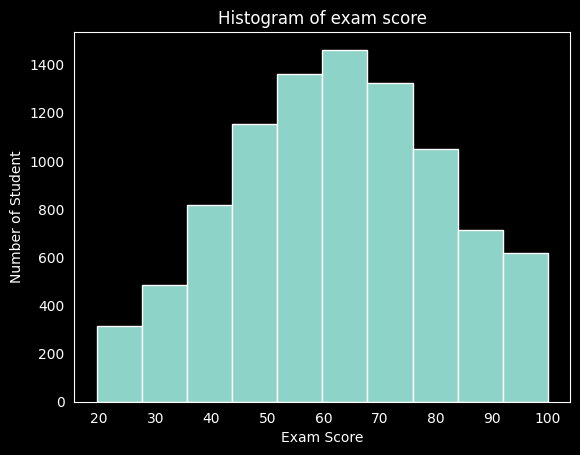

In [9]:
plt.hist(y_train)
plt.grid(False)
plt.title('Histogram of exam score')
plt.ylabel('Number of Student')
plt.xlabel('Exam Score')
plt.show()

## Correlation matrix

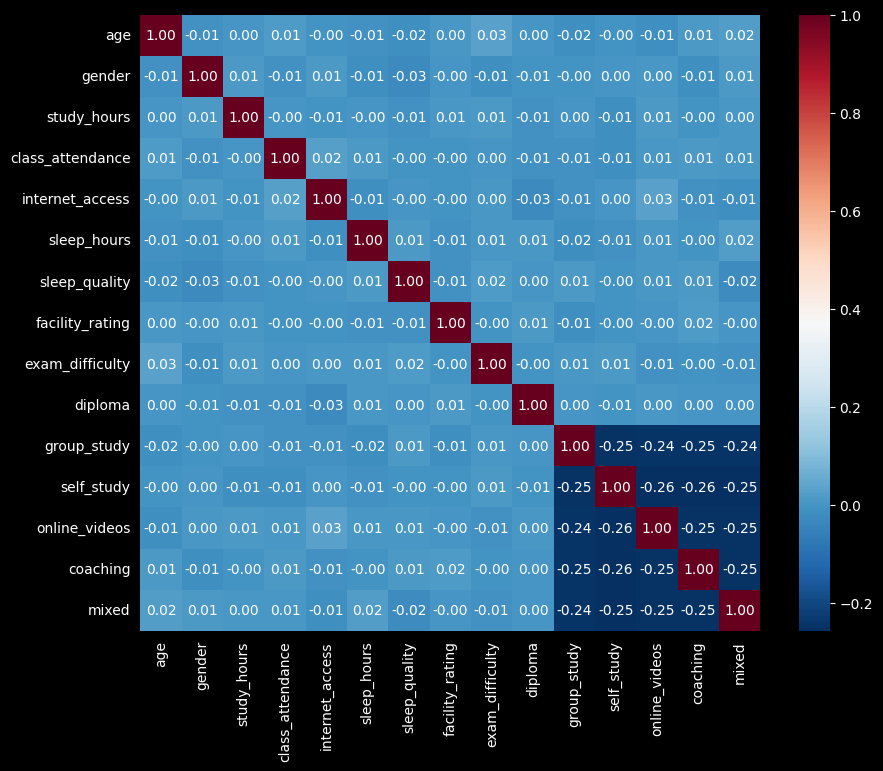

In [10]:
names = x_train.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')


plt.figure(figsize=(10, 8))
# 'annot=True' prints the values; 'fmt=".2f"' rounds to 2 decimal places
sns.heatmap(corr_mtx, annot=True, fmt=".2f", cmap="RdBu_r", xticklabels=names, yticklabels=names)
plt.show()

## Scatter Matrix

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='gender', ylabel='age'>,
        <Axes: xlabel='study_hours', ylabel='age'>,
        <Axes: xlabel='class_attendance', ylabel='age'>,
        <Axes: xlabel='internet_access', ylabel='age'>,
        <Axes: xlabel='sleep_hours', ylabel='age'>,
        <Axes: xlabel='sleep_quality', ylabel='age'>,
        <Axes: xlabel='facility_rating', ylabel='age'>,
        <Axes: xlabel='exam_difficulty', ylabel='age'>,
        <Axes: xlabel='diploma', ylabel='age'>,
        <Axes: xlabel='group_study', ylabel='age'>,
        <Axes: xlabel='self_study', ylabel='age'>,
        <Axes: xlabel='online_videos', ylabel='age'>,
        <Axes: xlabel='coaching', ylabel='age'>,
        <Axes: xlabel='mixed', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='gender'>,
        <Axes: xlabel='gender', ylabel='gender'>,
        <Axes: xlabel='study_hours', ylabel='gender'>,
        <Axes: xlabel='class_attendance', ylabel='gender'>,
        <Axes

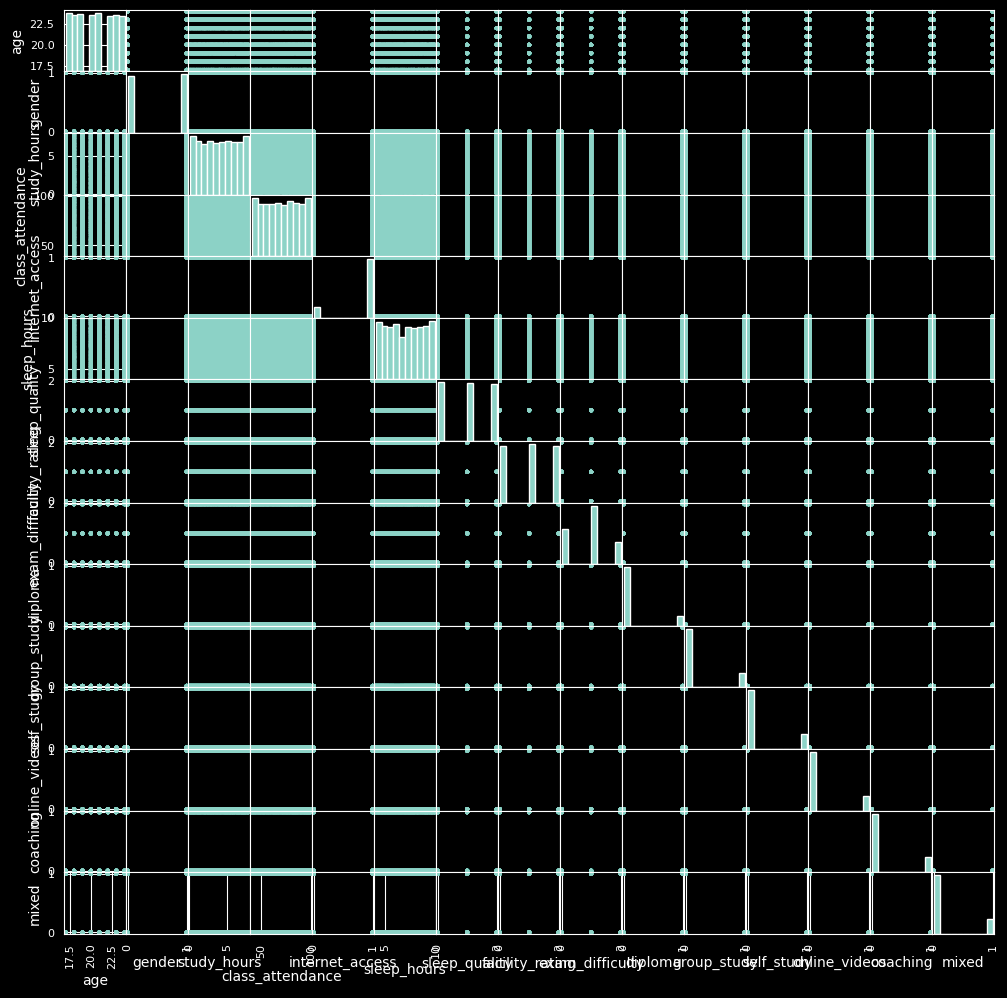

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(x_train, figsize = (12,12))

# VIF score

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_var_score = pd.DataFrame()
vif_var_score['name'] = names
vif_var_score['VIF'] = [vif(df_features.values, i) for i in range(len(names))]
vif_var_score['Variance'] = [np.var(df_features[n]) for n in names]

vif_var_score

,name,VIF,Variance
0,age,1.002237,5.250825
1,gender,1.001691,0.249972
2,study_hours,1.000714,5.329942
3,class_attendance,1.001527,299.434147
4,internet_access,1.002662,0.127677
5,sleep_hours,1.001702,3.022216
6,sleep_quality,1.002165,0.666731
7,facility_rating,1.000810,0.659341
8,exam_difficulty,1.001620,0.482480
9,diploma,1.001113,0.119489


# Feature Target Mutal Regression
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

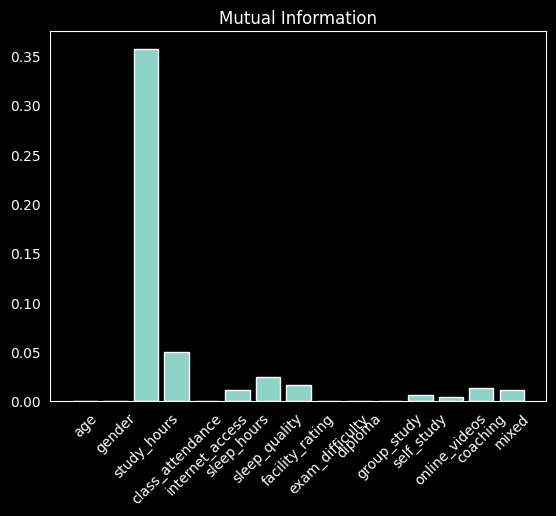

array([0.        , 0.        , 0.35645932, 0.04942279, 0.        ,
       0.01073764, 0.02419047, 0.0166844 , 0.        , 0.        ,
       0.        , 0.00603149, 0.00368688, 0.01320958, 0.01113064])

In [18]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(x_train, y_train)


plt.bar(names, mi)
plt.grid(False)
plt.xticks(rotation=45)
plt.title('Mutual Information')
plt.show()
mi

# Saving a new Data

In [14]:
FILE_NAME = 'new_Exam_Score_Prediction.csv'
data_copy.to_csv(FILE_NAME, index=False)